In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
#import contextily as ctx
import seaborn as sns

#### Expiriments with Customized Plotting Options

In [12]:
colors = [ # define report color pallette 
    '#00A878', # green
    '#2176AF', # blue
    '#FEDF40', # yellow
    '#FAA31B', # orange
    '#E83834', # red
    '#BC67A9', # purple
    '#606060' # grey
]

sns.set_palette(sns.color_palette(colors))

<AxesSubplot:xlabel='age', ylabel='class'>

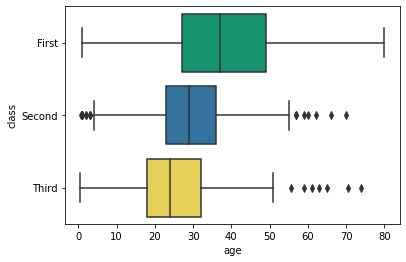

In [13]:
df = sns.load_dataset("titanic")
sns.boxplot(data=df, x="age", y="class")

In [16]:
import matplotlib.font_manager

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='otf')

['C:\\Windows\\Fonts\\esri_11.ttf',
 'C:\\Windows\\Fonts\\constan.ttf',
 'C:\\Users\\sreichert\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Montserrat-Thin.otf',
 'C:\\Windows\\Fonts\\BSSYM7.TTF',
 'C:\\Windows\\Fonts\\Montserrat-Italic.ttf',
 'C:\\Windows\\Fonts\\Montserrat-ExtraLightItalic.ttf',
 'C:\\Windows\\Fonts\\GILC____.TTF',
 'C:\\Users\\sreichert\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Montserrat-Black.otf',
 'C:\\Windows\\Fonts\\esri_27Mcr_2.ttf',
 'C:\\Windows\\Fonts\\MAGNETOB.TTF',
 'C:\\Windows\\Fonts\\ROCCB___.TTF',
 'C:\\Windows\\Fonts\\GLSNECB.TTF',
 'C:\\Windows\\Fonts\\Montserrat-BoldItalic.ttf',
 'C:\\Windows\\Fonts\\GOTHICI.TTF',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\BOD_B.TTF',
 'C:\\Windows\\Fonts\\micross.ttf',
 'C:\\Windows\\Fonts\\msyhl.ttc',
 'C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Users\\sreichert\\AppData\\Local\\Microsoft\\Windows\\Fonts\\IBMPlexSans-MediumItalic.ttf',
 'C:\\Windows\\Fonts\\LHANDW.TTF',
 'C:\\Windows\\Fonts\\OLDENGL.

### Analysis

In [4]:
station_gdf = gpd.read_file('data/Mesonet/daily_temp.gpkg')
station_gdf.head()

,date_time,stid,relative_humidity_high,air_temp_high,heat_index_high,relative_humidity_low,air_temp_low,heat_index_low,lon,lat,geometry
0,2018-01-01T00:00:00,KBUR,100.00,73.94,72.12299,22.35,44.6,42.07209,-118.36538,34.19967,POINT (-118.36538 34.19967)
1,2018-01-02T00:00:00,KBUR,82.14,80.96,79.29248,12.73,51.8,49.59400,-118.36538,34.19967,POINT (-118.36538 34.19967)
2,2018-01-03T00:00:00,KBUR,52.30,75.20,74.11247,16.05,53.6,50.30359,-118.36538,34.19967,POINT (-118.36538 34.19967)
3,2018-01-04T00:00:00,KBUR,50.37,75.20,74.23091,18.57,51.8,49.03376,-118.36538,34.19967,POINT (-118.36538 34.19967)
4,2018-01-05T00:00:00,KBUR,93.65,73.40,73.11665,40.92,53.6,52.77579,-118.36538,34.19967,POINT (-118.36538 34.19967)


In [5]:
station_loc = station_gdf.groupby('stid').first().reset_index()[['stid', 'geometry', 'lat', 'lon']]

In [6]:
stations = { # Selected by 
    'Downtown LA/USC' : 'KCQT',
    'LAX': 'KLAX',
    'Hawthorne': 'KHHR',
    'Van Nuys': 'KVNY',
    'Burbank': 'KBUR',
    'Whiteman': 'KWHP',
    'Santa Monica': 'KSMO',
    'Torrance': 'KTOA',
    'Long Beach': 'KLGB',
    'El Monte': 'KEMT'
    #'Camarillo': 'KCMA', Potential station on the north west of the city (near malibu)
    }

In [7]:
station_dict = {v:k for k, v in stations.items()}

In [8]:
station_loc['name'] = station_loc['stid'].map(station_dict)

In [9]:
station_loc.to_file('data/Mesonet/stations.gpkg', driver='GPKG', index=False)

In [10]:
stats = pd.read_csv('data/Analysis/district_t_test.csv')

In [11]:
stats['Significant'] = stats['t_test']<=0.05
stats

,District,no_heat_mean,heat_mean,t_test,Significant
0,1,7.240471,8.372093,0.013194,True
1,2,10.548767,12.232558,0.009155,True
2,3,11.748322,12.025641,0.315189,False
3,4,16.054220,17.210526,0.098621,False
4,5,5.536680,5.357143,0.610268,False
...,...,...,...,...,...
97,106,6.064723,6.401786,0.095643,False
98,107,4.107338,4.241573,0.215131,False
99,108,0.462104,0.559322,0.184508,False
100,109,1.295791,1.536232,0.052468,False


In [12]:
stats['Significant'].sum()

37

In [13]:
districts_gdf = gpd.read_file('data/LCVA/LCVA_pop.gpkg')
districts_gdf = districts_gdf[['District', 'geometry']]
districts_gdf['District'] = districts_gdf['District'].astype(int)

stats_gdf = districts_gdf.merge(stats, on='District')
stats_gdf

,District,geometry,no_heat_mean,heat_mean,t_test,Significant
0,58,"MULTIPOLYGON (((-118.36743 34.06034, -118.3672...",12.180609,11.136364,0.890532,False
1,23,"MULTIPOLYGON (((-118.53778 34.11104, -118.5766...",1.481253,1.950000,0.033918,True
2,47,"MULTIPOLYGON (((-118.16056 34.08369, -118.1605...",4.195726,4.918367,0.032585,True
3,55,"MULTIPOLYGON (((-118.23008 34.13561, -118.2304...",3.447383,3.180000,0.827803,False
4,62,"MULTIPOLYGON (((-118.43229 34.02398, -118.4338...",7.014901,8.533333,0.059903,False
...,...,...,...,...,...,...
97,43,"MULTIPOLYGON (((-118.40045 34.04014, -118.4004...",6.512438,6.111111,0.732560,False
98,40,"MULTIPOLYGON (((-118.24484 33.76312, -118.2452...",0.297507,0.272727,0.582094,False
99,92,"MULTIPOLYGON (((-118.42316 34.06581, -118.4233...",5.498065,5.833333,0.323098,False
100,20,"MULTIPOLYGON (((-118.25042 34.09495, -118.2505...",7.661625,8.238095,0.119153,False


In [14]:
mapping = {True: 'Significant', False: 'Not Significant'}
stats_gdf['for_plot'] = stats_gdf['Significant'].map(mapping)

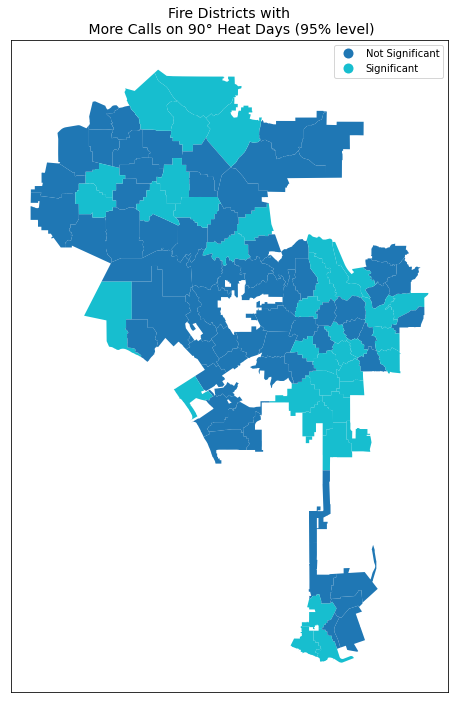

In [15]:
fig, ax = plt.subplots(figsize=(8,12))
stats_gdf.plot(column='for_plot', legend=True, ax=ax)
plt.xticks([])
plt.yticks([])

plt.title('Fire Districts with\n More Calls on 90° Heat Days (95% level)', fontsize='14')

plt.show()

In [16]:
stats_gdf.to_file('data/Analysis/t_test.shp')

c:\Users\sreichert\Anaconda3\envs\uds\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\sreichert\AppData\Local\Temp\ipykernel_37632\1840503613.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stats_gdf.to_file('data/Analysis/t_test.shp')
